# Vaex Experiments 

In [1]:
import os
import sys
import yaml
import json
import numpy as np

with open("config.yaml", 'r') as yml_file:
    cfg = yaml.safe_load(yml_file)
    
#Get data path from config 
data_path = cfg['brian_laptop']['data_path']
mb_div = cfg['constant']['mb_div']
gb_div = cfg['constant']['gb_div']

#Get dyype for meta file 
meta_data_file = os.path.join(data_path, cfg['data']['metadata'])
with open(meta_data_file) as f:
    meta_data = json.load(f)

In [2]:
import vaex
print(vaex.__version__)
import datetime as dt

1.0.0-beta.6


## Open Files 

- Not run for CSV files
- Not run for hdf files 

In [3]:
#parquet_snappy
yellow_taxi_file = os.path.join(data_path, cfg['data']['nyc_yellow_trip_parquet_snappy'])
yellow_taxi = vaex.open(yellow_taxi_file)

In [4]:
#parquet_gzip
yellow_taxi_file = os.path.join(data_path, cfg['data']['nyc_yellow_trip_parquet_gzip'])
yellow_taxi = vaex.open(yellow_taxi_file)

In [5]:
### hdf5
yellow_taxi_file = os.path.join(data_path, cfg['data']['nyc_yellow_trip_hdf5'])
yellow_taxi = vaex.open(yellow_taxi_file)

In [6]:
yellow_taxi #only shows what is needed

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,index
0,CMT,2010-06-18 10:43:46.000000000,2010-06-18 11:22:12.000000000,4,20.0,-73.97289399999998,40.79281,2,0.0,-73.776308,40.645528,Cas,45.0,0.0,0.5,0.0,4.57,50.07,0
1,CMT,2010-06-26 15:02:57.000000000,2010-06-26 15:07:15.000000000,1,0.7,-73.987815,40.74848,1,0.0,-73.977535,40.75388,Cas,4.5,0.0,0.5,0.0,0.0,5.0,1
2,CMT,2010-06-24 07:36:37.000000000,2010-06-24 07:43:29.000000000,1,1.0,-74.00649699999998,40.732921,1,0.0,-73.99812199999998,40.725982,Cas,5.7,0.0,0.5,0.0,0.0,6.2,2
3,CMT,2010-06-23 18:42:21.000000000,2010-06-23 18:55:41.000000000,2,3.5,-73.98753399999998,40.733397,1,0.0,-73.951097,40.770543,Cre,10.9,1.0,0.5,1.0,0.0,13.4,3
4,CMT,2010-06-23 14:10:43.000000000,2010-06-23 14:17:02.000000000,1,1.2,-73.955832,40.779476,1,0.0,-73.968117,40.765118,Cas,5.7,0.0,0.5,0.0,0.0,6.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"14,825,123",VTS,2010-06-03 12:59:00.000000000,2010-06-03 13:30:00.000000000,1,5.08,-73.994533,40.750563,1,nan,-73.944355,40.798977,CAS,18.9,0.0,0.5,0.0,0.0,19.4,14825123
"14,825,124",VTS,2010-06-05 17:51:00.000000000,2010-06-05 17:59:00.000000000,2,2.06,-73.982848,40.769117,1,nan,-74.001272,40.752168,CAS,7.3,0.0,0.5,0.0,0.0,7.8,14825124
"14,825,125",VTS,2010-06-15 08:58:00.000000000,2010-06-15 09:09:00.000000000,1,2.31,-74.00044,40.73736,1,nan,-73.97934499999998,40.762668,CAS,8.5,0.0,0.5,0.0,0.0,9.0,14825125
"14,825,126",VTS,2010-06-05 15:31:00.000000000,2010-06-05 15:34:00.000000000,1,0.5,-73.982557,40.742827,1,nan,-73.974788,40.741175,CAS,3.3,0.0,0.5,0.0,0.0,3.8,14825126


## Summary

In [7]:
# Takes some time 
yellow_taxi.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,index
dtype,str,datetime64[ns],datetime64[ns],int64,float64,float64,float64,int64,float64,float64,float64,str,float64,float64,float64,float64,float64,float64,int64
count,14825128,14825128,14825128,14825128,14825128,14825128,14825128,14825128,6670024,14825128,14825128,14825128,14825128,14825128,14825128,14825128,14825128,14825128,14825128
NA,0,0,0,0,0,0,0,0,8155104,0,0,0,0,0,0,0,0,0,0
mean,--,1970-01-01T00:02:14.126225803,1970-01-01T00:14:26.621764458,1.6725135863919691,2.804791597077461,-72.39904007221098,39.924888414135566,1.0348641846465,0.012675216760839242,-72.4265420091987,39.94008418099149,--,10.122361278768738,0.3287443271990636,0.4982612629044417,0.7899387593821198,0.18942537764280223,11.931144237004627,7412563.5
std,--,7.43865e+14,7.43864e+14,1.28233,3.23032,10.7638,10.6181,0.350489,0.111868,10.6059,10.6221,--,7.99042,0.369467,0.0294337,1.5956,0.963193,9.38099,4.27965e+06
min,--,2010-05-31T23:58:57.653309440,2010-05-31T23:58:57.653309440,0,0,-884.851,-3579.14,0,0,-772.75,-3538.43,--,2.5,0,0,0,0,2.5,0
max,--,2010-07-01T00:00:36.315791360,2010-07-01T12:43:23.487297536,208,50,3569.93,1963.52,210,1,1036.4,1963.52,--,200,8.05,0.5,100,20,235.9,14825127


## Expressions and Virtual Columns 

In [8]:
# First and last five values only
yellow_taxi.tip_amount / yellow_taxi.total_amount

Expression = (tip_amount / total_amount)
Length: 14,825,128 dtype: float64 (expression)
----------------------------------------------
       0          0
       1          0
       2          0
       3  0.0746269
       4          0
        ...        
14825123          0
14825124          0
14825125          0
14825126          0
14825127   0.212766

In [9]:
yellow_taxi['tip_percentage'] = yellow_taxi.tip_amount / yellow_taxi.total_amount

In [10]:
yellow_taxi['tip_percentage'].mean()

array(0.05513952)

## Value Count

In [11]:
yellow_taxi.passenger_count.value_counts()

1      10207628
2       2293152
5       1262078
3        680684
4        323814
6         57696
0            39
208          35
133           1
9             1
dtype: int64

In [12]:
## Group_by
yellow_taxi.pickup_datetime.dt.day_name

Expression = dt_day_name(pickup_datetime)
Length: 14,825,128 dtype: str (expression)
------------------------------------------
       0     Friday
       1   Saturday
       2   Thursday
       3  Wednesday
       4  Wednesday
        ...        
14825123   Thursday
14825124   Saturday
14825125    Tuesday
14825126   Saturday
14825127   Saturday

## Dates

In [13]:
yellow_taxi['pu_day_of_week'] = yellow_taxi.pickup_datetime.dt.day_name
yellow_taxi['pu_hour'] = yellow_taxi.pickup_datetime.dt.hour

## Groupby

In [14]:
# Pandas like API gor gorupby
#Need to check out binby
result = yellow_taxi.groupby(by = yellow_taxi.pu_hour).agg(
    {'fare_amount' :'mean',
    'tip_amount' :'mean',
    'tip_percentage':'mean'})

result

#,pu_hour,fare_amount,tip_amount,tip_percentage
0,16,10.444882046758021,0.787392007760463,0.04911476127337431
1,10,9.62861306325225,0.7257686454028937,0.05437319442548463
2,14,10.438686260632421,0.7451100014417018,0.05102339295269206
3,0,10.71235068532423,0.856506458995747,0.05772593441455527
4,1,10.379012590790973,0.8080855474169606,0.057444825145441095
...,...,...,...,...
19,17,10.22208287394335,0.7799384957952292,0.051260144851587836
20,21,9.943440160893307,0.8388010643274496,0.05944477155367505
21,3,10.77047735191637,0.7858542467984964,0.05554667438399715
22,5,13.445920821114447,1.1033992668621682,0.051053362031657966


## VAEX INTERESTING BITS ## 

### Plotting

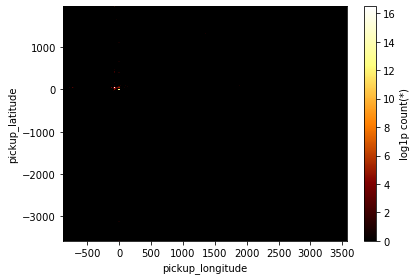

In [15]:
yellow_taxi.plot(yellow_taxi.pickup_longitude, 
                 yellow_taxi.pickup_latitude, 
                 f="log1p", 
                 show=True, 
                 limits="minmax");

In [16]:
yellow_taxi.plot_widget(yellow_taxi.pickup_longitude,
                       yellow_taxi.pickup_latitude,
                       f="log1p",
                       colormap='plasma',
                       limits = "minmax")

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='pickup_longitude', y='pickup_latitude', z=None)

### Machine Learning

In [17]:
#TODO
# Save the state as json and apply to test/new dataset like a pipeline. 
# PCA, Clustering, XGBoost

In [18]:
#Read up on Xarray - http://xarray.pydata.org/en/stable/

### Billion Rows 

In [20]:
df_file = os.path.join(data_path, cfg['data']['nyc_taxi_all_hdfs'])
print("File Size(GB):",round(os.path.getsize(df_file)/gb_div,3))

File Size(GB): 145.273


In [22]:
df = vaex.open(df_file)

In [23]:
df

#,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,fare_amount,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,3.0,19.0,40.75061798095703,-73.97478485107422,12.0,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15 19:23:42.000000000,2015-01-15 19:05:39.000000000,1.59
1,5.0,20.0,40.75910949707031,-73.99441528320312,14.5,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10 20:53:28.000000000,2015-01-10 20:33:38.000000000,3.3
2,5.0,20.0,40.82441329956055,-73.95182037353516,9.5,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10 20:43:41.000000000,2015-01-10 20:33:38.000000000,1.8
3,5.0,20.0,40.71998596191406,-74.00432586669923,3.5,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10 20:35:31.000000000,2015-01-10 20:33:39.000000000,0.5
4,5.0,20.0,40.742652893066406,-74.00418090820312,15.0,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10 20:52:58.000000000,2015-01-10 20:33:39.000000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,008,842,980",5.0,8.0,40.774517,-73.870063,28.1,0.5,1,0,5.0,8.0,40.771608,-73.98265999999998,0.0,5.5,34.1,2010-03-20 08:41:00.000000000,2010-03-20 08:15:00.000000000,11.15
"1,008,842,981",1.0,14.0,40.757468,-73.97167,7.3,0.5,1,1,1.0,14.0,40.759042,-73.98585,0.0,0.0,7.8,2010-03-16 14:41:00.000000000,2010-03-16 14:30:00.000000000,1.02
"1,008,842,982",4.0,22.0,40.754197,-73.991538,3.3,0.5,1,1,4.0,22.0,40.75184,-73.98651499999998,0.0,0.0,4.3,2010-03-19 22:40:00.000000000,2010-03-19 22:38:00.000000000,0.31
"1,008,842,983",3.0,14.0,40.738565,-73.98636,5.3,0.5,2,0,3.0,14.0,40.742438,-73.977537,2.0,0.0,7.8,2010-03-18 14:47:00.000000000,2010-03-18 14:41:00.000000000,0.72


In [24]:
df.passenger_count.value_counts()

1      700943378
2      146304008
5       67406302
3       43864181
6       25120458
4       21291754
0        3910825
208          869
7            440
9            358
8            320
49            26
10            17
255            5
129            4
250            3
33             2
65             2
15             2
58             2
25             1
19             1
177            1
193            1
163            1
211            1
34             1
225            1
229            1
232            1
247            1
249            1
223            1
37             1
36             1
160            1
47             1
169            1
51             1
61             1
254            1
70             1
91             1
97             1
125            1
133            1
137            1
141            1
66             1
dtype: int64